In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flujoVehicular = pd.read_csv('flujo-vehicular-2020.csv')
flujoVehicular

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414565,2020,2020-07-31,julio,Viernes,31,23,0,AVELLANEDA,N/D,Violación,Violación - Vía Cerrada,Provincia,107
1414566,2020,2020-07-31,julio,Viernes,31,23,0,DELLEPIANE LINIERSLEPIANE CENTRO,N/D,Violación,Violación - Vía Cerrada,Centro,95
1414567,2020,2020-07-31,julio,Viernes,31,23,0,DELLEPIANE LINIERS,N/D,Violación,Violación - Vía Cerrada,Provincia,107
1414568,2020,2020-07-31,julio,Viernes,31,23,0,ILLIA,N/D,Violación,Violación - Vía Cerrada,Centro,21


In [3]:
flujoVehicular['forma_pago'].unique()

array(['Efectivo', 'Rec.Deuda', 'Tarjeta Magnética', 'Tag', 'Exento',
       'Violación', 'CPP'], dtype=object)

In [4]:
# cambiamos en la columna forma_pago el valor de violencia x fraude y despues ordenamos x algunos datos
flujoVehicular.loc[flujoVehicular["forma_pago"] == 'Violación', 'forma_pago'] = 'Fraude'
flujoVehicular.sort_values(by=['dia_fecha', 'dia', 'hora_inicio', 'tipo_vehiculo'], inplace=True)
flujoVehicular

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
480755,2020,2020-03-01 00:00:00,marzo,Domingo,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,20
480756,2020,2020-03-01 00:00:00,marzo,Domingo,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,59
480757,2020,2020-03-01 00:00:00,marzo,Domingo,1,0,1,ALBERDI,Auto,Exento,Exento - Reglamento,Centro,1
480758,2020,2020-03-01 00:00:00,marzo,Domingo,1,0,1,ALBERDI,Auto,Exento,Exento - Reglamento,Provincia,3
480759,2020,2020-03-01 00:00:00,marzo,Domingo,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413974,2020,2020-07-31,julio,Viernes,31,23,0,PB1,Pesados 6 Ejes,Fraude,Violación - Normal,Provincia,1
1413975,2020,2020-07-31,julio,Viernes,31,23,0,PB2,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,3
1413976,2020,2020-07-31,julio,Viernes,31,23,0,PB3,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Provincia,1
1413977,2020,2020-07-31,julio,Viernes,31,23,0,PB4,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,6


In [5]:
flujoVehicularAnalizar = flujoVehicular[['mes', 'dia_fecha', 'dia', 'hora_inicio', 'hora_fin', 'estacion', 'tipo_vehiculo', 'forma_pago', 'sentido', 'cantidad_pasos']]
flujoVehicularAnalizar

,mes,dia_fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
480755,marzo,1,Domingo,0,1,ALBERDI,Auto,Efectivo,Centro,20
480756,marzo,1,Domingo,0,1,ALBERDI,Auto,Efectivo,Provincia,59
480757,marzo,1,Domingo,0,1,ALBERDI,Auto,Exento,Centro,1
480758,marzo,1,Domingo,0,1,ALBERDI,Auto,Exento,Provincia,3
480759,marzo,1,Domingo,0,1,ALBERDI,Auto,Rec.Deuda,Provincia,1
...,...,...,...,...,...,...,...,...,...,...
1413974,julio,31,Viernes,23,0,PB1,Pesados 6 Ejes,Fraude,Provincia,1
1413975,julio,31,Viernes,23,0,PB2,Pesados 6 Ejes,Tag,Centro,3
1413976,julio,31,Viernes,23,0,PB3,Pesados 6 Ejes,Tag,Provincia,1
1413977,julio,31,Viernes,23,0,PB4,Pesados 6 Ejes,Tag,Centro,6


In [6]:
type(flujoVehicularAnalizar)

pandas.core.frame.DataFrame

In [7]:
# pases mensuales acumulados
flujoVehicularAnalizar.groupby('mes')['cantidad_pasos'].sum()

mes
abril       3652227
enero      10599277
febrero    10229653
julio       5383861
junio       5266194
marzo       7407166
mayo        4902260
Name: cantidad_pasos, dtype: int64

Text(0.5, 1.0, 'Pases totales por mes')

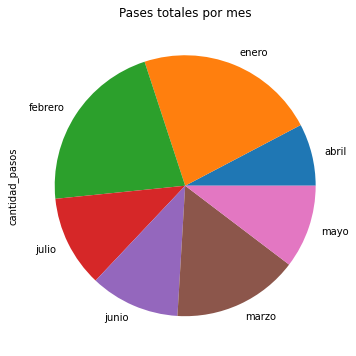

In [8]:
plt.figure(figsize=(6,6))
flujoVehicularAnalizar.groupby('mes')['cantidad_pasos'].sum().plot(kind='pie')
plt.title('Pases totales por mes')

In [9]:
#pases totales segun sentido de circulacion
flujoVehicularAnalizar.groupby('sentido')['cantidad_pasos'].sum()

sentido
Centro       23359157
Provincia    24081481
Name: cantidad_pasos, dtype: int64

Text(0.5, 1.0, 'Pases totales por Direccion')

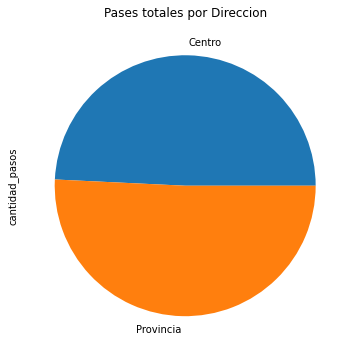

In [10]:
plt.figure(figsize=(6,6))
flujoVehicularAnalizar.groupby('sentido')['cantidad_pasos'].sum().plot(kind='pie')
plt.title('Pases totales por Direccion')

In [11]:
flujoVehicularMarzo = flujoVehicularAnalizar[flujoVehicularAnalizar['mes']=='marzo']
flujoVehicularMarzo

,mes,dia_fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
480755,marzo,1,Domingo,0,1,ALBERDI,Auto,Efectivo,Centro,20
480756,marzo,1,Domingo,0,1,ALBERDI,Auto,Efectivo,Provincia,59
480757,marzo,1,Domingo,0,1,ALBERDI,Auto,Exento,Centro,1
480758,marzo,1,Domingo,0,1,ALBERDI,Auto,Exento,Provincia,3
480759,marzo,1,Domingo,0,1,ALBERDI,Auto,Rec.Deuda,Provincia,1
...,...,...,...,...,...,...,...,...,...,...
678730,marzo,31,Martes,23,0,ILP,Pesados 6 Ejes,Fraude,Provincia,1
678731,marzo,31,Martes,23,0,PB1,Pesados 6 Ejes,Tag,Provincia,14
678732,marzo,31,Martes,23,0,PB1,Pesados 6 Ejes,Fraude,Provincia,2
678733,marzo,31,Martes,23,0,PB4,Pesados 6 Ejes,Tag,Centro,6


In [12]:
#total de pases segun medio de pago durante marzo
flujoVehicularMarzo.groupby('forma_pago')['cantidad_pasos'].sum()

forma_pago
CPP                   167329
Efectivo             2515380
Exento                 69320
Fraude                693892
Rec.Deuda              63117
Tag                  3865557
Tarjeta Magnética      32571
Name: cantidad_pasos, dtype: int64

Text(0.5, 1.0, 'Pases totales por Medio de pago MARZO')

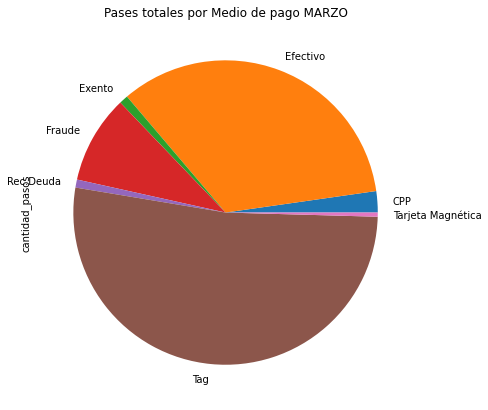

In [13]:
plt.figure(figsize=(7,7))
flujoVehicularMarzo.groupby('forma_pago')['cantidad_pasos'].sum().plot(kind='pie')
plt.title('Pases totales por Medio de pago MARZO')

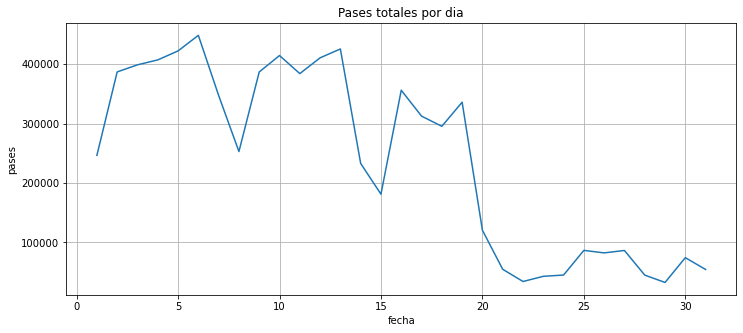

In [15]:
#pases totales diarios segun fecha
plt.figure(figsize=(12,5))
flujoVehicularMarzo.groupby('dia_fecha')['cantidad_pasos'].sum().plot(kind='line')
plt.xlabel('fecha')
plt.ylabel('pases')
plt.title('Pases totales por dia')
plt.grid(True)